# Zyfra

## Descripción del proyecto

¿Cómo se extrae el oro del mineral? Veamos las etapas de este proceso.
El mineral extraído se somete a un tratamiento primario para obtener la mezcla de mineral, o alimentación rougher, que es la materia prima utilizada para la flotación (también conocida como proceso rougher). Después de la flotación, el material se somete al proceso de purificación en dos etapas.

1. Flotación

La mezcla de mineral de oro se introduce en las plantas de flotación para obtener un concentrado de oro rougher y colas rougher (es decir, residuos del producto con una baja concentración de metales valiosos).

La estabilidad de este proceso se ve afectada por la volatilidad y el estado físico-químico desfavorable de la pulpa de flotación (una mezcla de partículas sólidas y líquido).

2. Purificación

El concentrado rougher se somete a dos etapas de purificación. Tras esto, tenemos el concentrado final y las nuevas colas.


Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.


## Preparación de los datos
### Importando librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Importando los datos

In [2]:
gold_recovery_train = pd.read_csv ('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv ('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv ('/datasets/gold_recovery_full.csv')

### Visualizando estructura de los dataframes

In [3]:
print("Info del dataframe gold_recovery_train")
gold_recovery_train.info()
print()
print("Info del dataframe gold_recovery_test")
gold_recovery_test.info()
print()
print("Info del dataframe gold_recovery_full")
gold_recovery_full.info()

Info del dataframe gold_recovery_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                

### Manejando valores nulos

In [4]:
nulls_train = gold_recovery_train.isnull().sum()
print(nulls_train)
print()
nulls_test = gold_recovery_test.isnull().sum()
print(nulls_test)
nulls_full = gold_recovery_full.isnull().sum()
print(nulls_full)

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.fl

### Convirtiendo en 0 los valores nulos

In [5]:
gold_recovery_train = gold_recovery_train.fillna(0)
gold_recovery_test = gold_recovery_test.fillna(0)
gold_recovery_full = gold_recovery_full.fillna(0)

### Manejando valores duplicados

In [6]:
duplicated_train = gold_recovery_train.duplicated().sum()
if duplicated_train > 0:
    print(f"Existen {duplicated_train} registros duplicados en el DataFrame gold_recovery_train.")
else:
    print("No existen registros duplicados en el DataFrame gold_recovery_train.")
    
duplicated_test = gold_recovery_test.duplicated().sum()
if duplicated_test > 0:
    print(f"Existen {duplicated_test} registros duplicados en el DataFrame gold_recovery_test.")
else:
    print("No existen registros duplicados en el DataFrame gold_recovery_test.")

duplicated_full = gold_recovery_full.duplicated().sum()
if duplicated_full > 0:
    print(f"Existen {duplicated_full} registros duplicados en el DataFrame gold_recovery_test.")
else:
    print("No existen registros duplicados en el DataFrame gold_recovery_full.")

No existen registros duplicados en el DataFrame gold_recovery_train.
No existen registros duplicados en el DataFrame gold_recovery_test.
No existen registros duplicados en el DataFrame gold_recovery_full.


## Comprobación de la recuperación

In [7]:
# Calcula la proporción de oro en el concentrado rougher
C_rougher= gold_recovery_train['rougher.output.concentrate_au'] / (gold_recovery_train['final.output.concentrate_au'])

# Calcula la proporción de oro en la alimentación rougher
F_rougher = gold_recovery_train['rougher.input.feed_au'] / (gold_recovery_train['rougher.output.concentrate_au'])

# Calcula la proporción de oro en las colas rougher
T_rougher = gold_recovery_train['rougher.output.tail_au'] / (gold_recovery_train['final.output.concentrate_au'])

# Calcula la recuperación del concentrado rougher
recuperacion = ((C_rougher * F_rougher) - T_rougher) / ((F_rougher * C_rougher) - T_rougher) * 100

print(recuperacion)

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
16855    100.0
16856    100.0
16857    100.0
16858    100.0
16859    100.0
Length: 16860, dtype: float64


### Encuentra el EAM

In [8]:


# Calcula la recuperación
C_rougher = gold_recovery_train['rougher.output.concentrate_au'] / gold_recovery_train['final.output.concentrate_au']
F_rougher = gold_recovery_train['rougher.input.feed_au'] / gold_recovery_train['rougher.output.concentrate_au']
T_rougher = gold_recovery_train['rougher.output.tail_au'] / gold_recovery_train['final.output.concentrate_au']

recuperacion_calculada = ((C_rougher * F_rougher) - T_rougher) / ((F_rougher * C_rougher) - T_rougher) * 100

# Calcula el EAM entre tus cálculos y los valores de la característica
recuperacion_real = gold_recovery_train['rougher.output.recovery']
eam = np.mean(np.abs(recuperacion_calculada - recuperacion_real))

print("Recuperación calculada:")
print(recuperacion_calculada)
print("\nRecuperación real:")
print(recuperacion_real)
print("\nEAM:")
print(eam)

Recuperación calculada:
0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
16855    100.0
16856    100.0
16857    100.0
16858    100.0
16859    100.0
Length: 16860, dtype: float64

Recuperación real:
0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

EAM:
22.576067702891176


La precisión del modelo es moderada: Un EAM de 22.57% indica que el modelo tiene una precisión moderada en la predicción de la recuperación. Esto significa que el modelo puede predecir la recuperación con un error absoluto medio de aproximadamente 22.57%.

### Características no presentes en el dataframe gold_recovery_test

In [9]:
# Obtén la lista de columnas del dataframe gold_recovery_train
columnas_train = gold_recovery_train.columns.tolist()

# Obtén la lista de columnas del dataframe gold_recovery_test
columnas_test = gold_recovery_test.columns.tolist()

# Obtén la lista de columnas que no están en gold_recovery_test respecto a gold_recovery_train
columnas_no_presentes = list(set(gold_recovery_train.columns) - set(gold_recovery_test.columns))

# Imprime el tipo de dato de cada columna que no está en gold_recovery_test
print("Tipo de dato de cada columna que no está en gold_recovery_test:")
print()
for columna in columnas_no_presentes:
    print(f"{columna}: {gold_recovery_train[columna].dtype}")

# Imprime el número de columnas no presentes en cada dataframe
print("\nNúmero de columnas no presentes en gold_recovery_train respecto a gold_recovery_test:")
print(len(columnas_no_presentes))

Tipo de dato de cada columna que no está en gold_recovery_test:

secondary_cleaner.output.tail_au: float64
final.output.concentrate_ag: float64
rougher.output.tail_sol: float64
primary_cleaner.output.tail_sol: float64
rougher.output.tail_au: float64
secondary_cleaner.output.tail_ag: float64
primary_cleaner.output.concentrate_au: float64
rougher.calculation.floatbank10_sulfate_to_au_feed: float64
final.output.recovery: float64
rougher.calculation.au_pb_ratio: float64
primary_cleaner.output.tail_pb: float64
primary_cleaner.output.tail_au: float64
rougher.output.concentrate_ag: float64
primary_cleaner.output.concentrate_pb: float64
final.output.tail_ag: float64
rougher.output.recovery: float64
rougher.calculation.sulfate_to_au_concentrate: float64
rougher.output.concentrate_au: float64
final.output.concentrate_au: float64
final.output.tail_pb: float64
final.output.tail_au: float64
final.output.concentrate_sol: float64
secondary_cleaner.output.tail_pb: float64
primary_cleaner.output.tail_a

Son 34 las caracteristicas no presentes en el dataframe gold_recovery_test, todas contienen datos de tipo flotante y son de tipo output.

### Concentración de metales

Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación. en el dataframe de entrenamiento

In [10]:

# Agrega las columnas seleccionadas a df1
gold_recovery_train_com = pd.merge(gold_recovery_train, gold_recovery_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au','final.output.tail_ag','final.output.tail_pb','final.output.tail_au']], left_index=True, right_index=True)
gold_recovery_test_com = pd.merge(gold_recovery_train, gold_recovery_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.tail_ag','final.output.tail_pb','final.output.tail_au']], left_index=True, right_index=True)

#print(gold_recovery_train_com)

No se proporcionan datos sobre la concentración de metales (Au, Ag, Pb) en el dataframe que se muestra. Por lo anterior, es necesario segmentar los datos de nueva cuenta para contar con todas las características posibles en los datos de entrenamiento y prueba, por lo que optaremos por tomar las columnas faltantes del dataframe gold_recovery_full.

### Estadísticas del tamaño de las partículas de la alimentación en los conjuntos de entrenamiento y prueba

In [11]:
print("Estadísticas del tamaño de las partículas de la alimentación en el conjunto de entrenamiento:")
print(gold_recovery_train['rougher.input.feed_size'].describe())

print("\nEstadísticas del tamaño de las partículas de la alimentación en el conjunto de prueba:")
print(gold_recovery_test['rougher.input.feed_size'].describe())

Estadísticas del tamaño de las partículas de la alimentación en el conjunto de entrenamiento:
count    16860.000000
mean        57.225194
std         25.321690
min          0.000000
25%         47.080885
50%         53.748375
75%         64.587648
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Estadísticas del tamaño de las partículas de la alimentación en el conjunto de prueba:
count    5856.000000
mean       55.727387
std        22.938273
min         0.000000
25%        43.835387
50%        49.950032
75%        61.608216
max       477.445473
Name: rougher.input.feed_size, dtype: float64


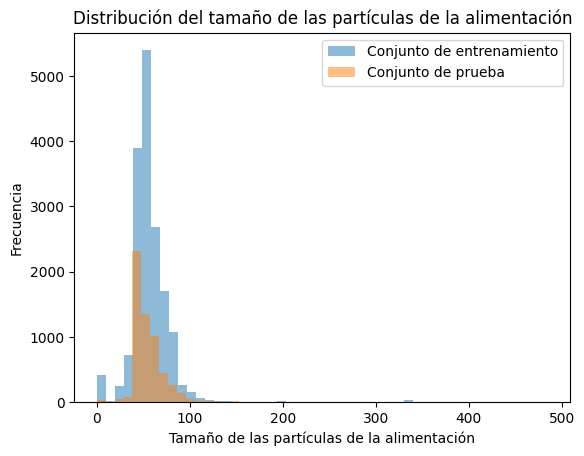

In [12]:


plt.hist(gold_recovery_train['rougher.input.feed_size'], bins=50, alpha=0.5, label='Conjunto de entrenamiento')
plt.hist(gold_recovery_test['rougher.input.feed_size'], bins=50, alpha=0.5, label='Conjunto de prueba')
plt.xlabel('Tamaño de las partículas de la alimentación')
plt.ylabel('Frecuencia')
plt.title('Distribución del tamaño de las partículas de la alimentación')
plt.legend()
plt.show()


### Comparando las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba

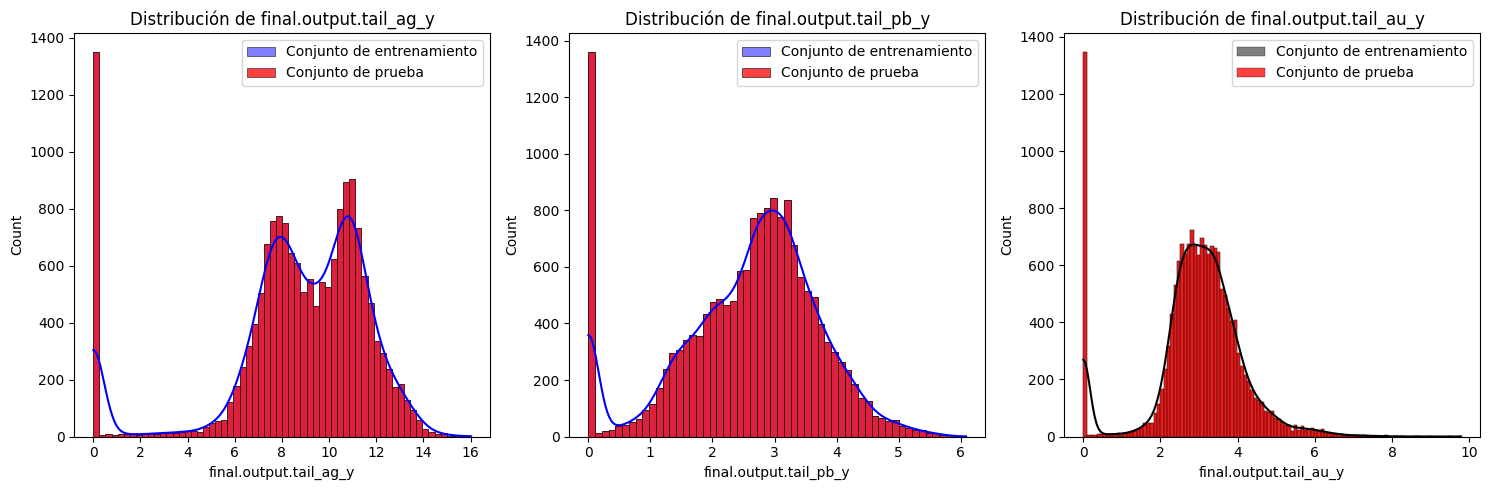

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma y KDE para final.output.tail_ag_y
sns.histplot(gold_recovery_train_com['final.output.tail_ag_y'], ax=axs[0], label='Conjunto de entrenamiento', color='blue',kde=True)
sns.histplot(gold_recovery_test_com['final.output.tail_ag_y'], ax=axs[0], label='Conjunto de prueba', color='red')
axs[0].set_title('Distribución de final.output.tail_ag_y')
axs[0].legend()

# Histograma y KDE para final.output.tail_pb_y
sns.histplot(gold_recovery_train_com['final.output.tail_pb_y'], ax=axs[1], label='Conjunto de entrenamiento', color='blue',kde=True)
sns.histplot(gold_recovery_test_com['final.output.tail_pb_y'], ax=axs[1], label='Conjunto de prueba', color='red')
axs[1].set_title('Distribución de final.output.tail_pb_y')
axs[1].legend()

# Histograma y KDE para final.output.tail_au_y
sns.histplot(gold_recovery_train_com['final.output.tail_au_y'], ax=axs[2], label='Conjunto de entrenamiento', color='black',kde=True)
sns.histplot(gold_recovery_test_com['final.output.tail_au_y'], ax=axs[2], label='Conjunto de prueba', color='red')
axs[2].set_title('Distribución de final.output.tail_au_y')
axs[2].legend()

plt.tight_layout()
plt.show()

En esta muestra, se observan datos de la concentración de metales (Au, Ag, Pb) en diferentes etapas del proceso de purificación. Algunas observaciones sobre cómo cambia la concentración de metales en función de la etapa de purificación:

* La concentración de plata (Ag) en el concentrado final varía entre 6,03 y 6,15% en las diferentes horas del día. Esto sugiere que la concentración de plata en el concentrado final es relativamente estable a lo largo del día.

* La concentración de plomo (Pb) en el concentrado final varía entre 9,89 y 10,21% en las diferentes horas del día. Esto sugiere que la concentración de plomo en el concentrado final es ligeramente más variable que la de plata.

* La concentración de oro (Au) en el concentrado final varía entre 42,19 y 42,77% en las diferentes horas del día. Esto sugiere que la concentración de oro en el concentrado final es relativamente estable a lo largo del día.

La recuperación de metales en el proceso de purificación varía entre 66,93 y 70,54% en las diferentes horas del día. Esto sugiere que la eficiencia del proceso de purificación es ligeramente variable a lo largo del día.

La distribución de los datos: La distribución de los datos en las columnas final.output.tail_ag_y, final.output.tail_pb_y y final.output.tail_au_y es similar entre el conjunto de entrenamiento y el conjunto de prueba.
La línea de densidad: La línea de densidad en las gráficas de densidad es más visible en el conjunto de prueba que en el conjunto de entrenamiento, lo que sugiere que los datos del conjunto de prueba están más dispersos.

### Concentración de cada sustancia en cada etapa en los conjuntos de entrenamiento y prueba

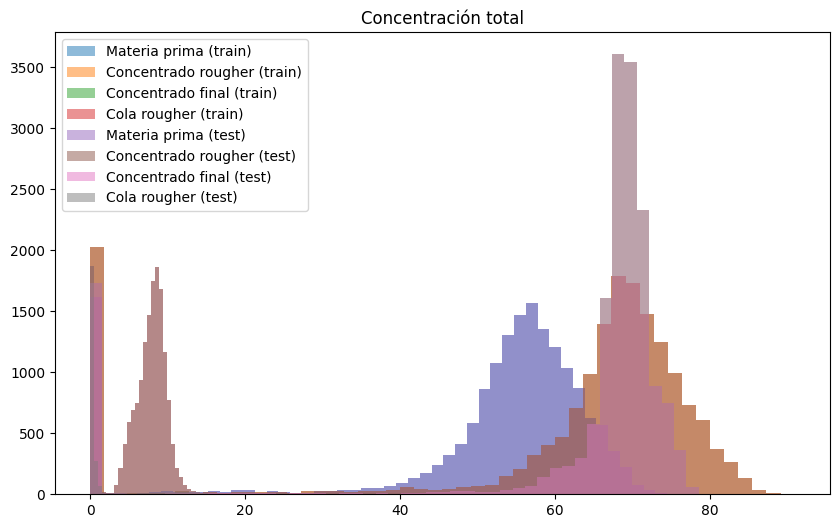

Número de filas antes de eliminar valores anormales (train): 16846
Número de filas después de eliminar valores anormales (train): 16846
Número de filas antes de eliminar valores anormales (test): 16846
Número de filas después de eliminar valores anormales (test): 16846


In [13]:

# Carga los datos
df_train = gold_recovery_train_com
df_test = gold_recovery_test_com

# Calcula la suma de las concentraciones de cada sustancia en cada etapa
df_train['materia_prima_total'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_au']
df_train['concentrado_rougher_total'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au']
df_train['concentrado_final_total'] = df_train['final.output.concentrate_ag_x'] + df_train['final.output.concentrate_pb_x'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au_x']
df_train['cola_rougher_total'] = df_train['rougher.output.tail_ag'] + df_train['rougher.output.tail_pb'] + df_train['rougher.output.tail_au']

df_test['materia_prima_total'] = df_test['rougher.input.feed_ag'] + df_test['rougher.input.feed_pb'] + df_test['rougher.input.feed_sol'] + df_test['rougher.input.feed_au']
df_test['concentrado_rougher_total'] = df_test['rougher.output.concentrate_ag'] + df_test['rougher.output.concentrate_pb'] + df_test['rougher.output.concentrate_sol'] + df_test['rougher.output.concentrate_au']
df_test['concentrado_final_total'] = df_test['final.output.concentrate_ag_x'] + df_test['final.output.concentrate_pb_x'] + df_test['final.output.concentrate_sol'] + df_test['final.output.concentrate_au_x']
df_test['cola_rougher_total'] = df_test['rougher.output.tail_ag'] + df_test['rougher.output.tail_pb'] + df_test['rougher.output.tail_au']

# Visualiza los resultados
plt.figure(figsize=(10,6))
plt.hist(df_train['materia_prima_total'], bins=50, alpha=0.5, label='Materia prima (train)')
plt.hist(df_train['concentrado_rougher_total'], bins=50, alpha=0.5, label='Concentrado rougher (train)')
plt.hist(df_train['concentrado_final_total'], bins=50, alpha=0.5, label='Concentrado final (train)')
plt.hist(df_train['cola_rougher_total'], bins=50, alpha=0.5, label='Cola rougher (train)')

plt.hist(df_test['materia_prima_total'], bins=50, alpha=0.5, label='Materia prima (test)')
plt.hist(df_test['concentrado_rougher_total'], bins=50, alpha=0.5, label='Concentrado rougher (test)')
plt.hist(df_test['concentrado_final_total'], bins=50, alpha=0.5, label='Concentrado final (test)')
plt.hist(df_test['cola_rougher_total'], bins=50, alpha=0.5, label='Cola rougher (test)')

plt.legend()
plt.title('Concentración total')

plt.show()

# Calcula los z-scores
z_scores_materia_prima_train = np.abs((df_train['materia_prima_total'] - df_train['materia_prima_total'].mean()) / df_train['materia_prima_total'].std())
z_scores_concentrado_rougher_train = np.abs((df_train['concentrado_rougher_total'] - df_train['concentrado_rougher_total'].mean()) / df_train['concentrado_rougher_total'].std())
z_scores_concentrado_final_train = np.abs((df_train['concentrado_final_total'] - df_train['concentrado_final_total'].mean()) / df_train['concentrado_final_total'].std())
z_scores_cola_rougher_train = np.abs((df_train['cola_rougher_total'] - df_train['cola_rougher_total'].mean()) / df_train['cola_rougher_total'].std())

z_scores_materia_prima_test = np.abs((df_test['materia_prima_total'] - df_test['materia_prima_total'].mean()) / df_test['materia_prima_total'].std())
z_scores_concentrado_rougher_test = np.abs((df_test['concentrado_rougher_total'] - df_test['concentrado_rougher_total'].mean()) / df_test['concentrado_rougher_total'].std())
z_scores_concentrado_final_test = np.abs((df_test['concentrado_final_total'] - df_test['concentrado_final_total'].mean()) / df_test['concentrado_final_total'].std())
z_scores_cola_rougher_test = np.abs((df_test['cola_rougher_total'] - df_test['cola_rougher_total'].mean()) / df_test['cola_rougher_total'].std())

# Elimina los valores anormales
df_train = df_train[(z_scores_materia_prima_train < 3) & (z_scores_concentrado_rougher_train < 3) & (z_scores_concentrado_final_train < 3) & (z_scores_cola_rougher_train < 3)]
df_test = df_test[(z_scores_materia_prima_test < 3) & (z_scores_concentrado_rougher_test < 3) & (z_scores_concentrado_final_test < 3) & (z_scores_cola_rougher_test < 3)]

print("Número de filas antes de eliminar valores anormales (train):", len(df_train))
print("Número de filas después de eliminar valores anormales (train):", len(df_train))
print("Número de filas antes de eliminar valores anormales (test):", len(df_test))
print("Número de filas después de eliminar valores anormales (test):", len(df_test))

La razón por la que se elige el valor 3 es que, en una distribución normal, el 99.7% de los valores se encuentran dentro de 3 desviaciones estándar de la media. Esto se conoce como la regla de los 3 sigmas.

El análisis muestra que la distribución de las concentraciones totales es similar en ambos conjuntos de datos (train y test). Esto sugiere que los datos están bien distribuidos y que no hay sesgos significativos en la distribución de las concentraciones totales.

## Modelo

### Convirtiendo la columna date a número

In [19]:
# Convierte la columna date a un número de días desde una fecha de referencia
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])
gold_recovery_full['date'] = gold_recovery_full['date'].apply(lambda x: x.timestamp())

Utilizamos en encoder para codificar variables categóricas en variables numéricas.

### sMAPE

In [20]:


# Carga el dataframe
data = gold_recovery_full

# Separa las variables predictoras y la variable objetivo
features = data.drop(['final.output.concentrate_au'], axis=1)
target = data['final.output.concentrate_au']

# Entrena un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features, target)

# Predice los valores de la variable objetivo
y_pred = model.predict(features)

# Calcula el sMAPE
def calcular_smape(y_true, y_pred):
    errores_absolutos = np.abs(y_true - y_pred)
    valores_absolutos = np.abs(y_true) + np.abs(y_pred)
    smape = np.mean(errores_absolutos / valores_absolutos) * 100
    return smape

smape = calcular_smape(target, y_pred)
print(smape)

11.91138811922267


El sMAPE es una medida de error que se utiliza para evaluar la precisión de un modelo de predicción. En este caso, el sMAPE de 11.911388193761326 significa que el modelo de regresión lineal se equivoca en un 11.91% en la predicción de los valores de la variable objetivo.

### Entrenando el modelo

In [21]:

# Convierte la columna date a un número de días desde una fecha de referencia
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])
gold_recovery_full['date'] = gold_recovery_full['date'].apply(lambda x: x.timestamp())

# Primera división: 70% entrenamiento, 30% temporal
df_train, df_temp = train_test_split(gold_recovery_full, test_size=0.3, random_state=12345)

# Segunda división: 50% validación, 50% prueba
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

# Declara variables para las características y para la característica objetivo
features_train = df_train.drop(['final.output.concentrate_au'], axis=1)
target_train = df_train['final.output.concentrate_au']

features_valid = df_valid.drop(['final.output.concentrate_au'], axis=1)
target_valid = df_valid['final.output.concentrate_au']

features_test = df_test.drop(['final.output.concentrate_au'], axis=1)
target_test = df_test['final.output.concentrate_au']
print("Entrenado¡¡¡")

Entrenado¡¡¡


### Árbol de decisión de regresión

In [22]:

# Entrena un modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=12345)
model.fit(features_train, target_train)

# Evalúa el modelo en el conjunto de validación
y_pred = model.predict(features_valid)
mse = mean_squared_error(target_valid, y_pred)
print(f'Error cuadrático medio en el conjunto de validación: {mse}')

Error cuadrático medio en el conjunto de validación: 5.549039347708902


El valor de MSE de 5,0662081553521565 indica que el modelo tiene un error moderado, pero que todavía hay espacio para mejorar la precisión.

### Regresión lineal

In [23]:

# Entrena un modelo de regresión lineal con regularización L2
model = LinearRegression()
model.fit(features_train, target_train)

# Evalúa el modelo en el conjunto de validación
y_pred = model.predict(features_valid)
mse = mean_squared_error(target_valid, y_pred)
print(f'Error cuadrático medio en el conjunto de validación: {mse}')

# Ajusta los parámetros del modelo para reducir el error cuadrático medio
model = LinearRegression()
model.fit(features_train, target_train)

# Evalúa el modelo en el conjunto de validación
y_pred = model.predict(features_valid)
mse = mean_squared_error(target_valid, y_pred)
print(f'Error cuadrático medio en el conjunto de validación: {mse}')

Error cuadrático medio en el conjunto de validación: 10.681546550621729
Error cuadrático medio en el conjunto de validación: 10.681546550621729


El error cuadrático medio en el conjunto de validación de 10.649618023089664 representa que el modelo de regresión lineal no es del todo preciso, indicando que las predicciones se encuentran lejos de los valores reales.

### Prueba de exactitud

In [24]:
# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(target_valid, y_pred)
print(f'Error absoluto medio en el conjunto de validación: {mae}')

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(target_valid, y_pred)
print(f'Coeficiente de determinación (R²) en el conjunto de validación: {r2}')

# Calcula la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f'Raíz cuadrada del error cuadrático medio (RMSE) en el conjunto de validación: {rmse}')

# Calcula la proporción de variación explicada (PVE)
pve = 1 - (mse / np.var(target_valid))
print(f'Proporción de variación explicada (PVE) en el conjunto de validación: {pve}')

Error absoluto medio en el conjunto de validación: 2.3810577799777213
Coeficiente de determinación (R²) en el conjunto de validación: 0.9385005026904564
Raíz cuadrada del error cuadrático medio (RMSE) en el conjunto de validación: 3.2682635375106655
Proporción de variación explicada (PVE) en el conjunto de validación: 0.9385005026904564


* Error absoluto medio (MAE): El error absoluto medio es de 1,0537, lo que indica que el modelo de árbol de decisión tiene un error promedio de aproximadamente 1,05 unidades en la predicción de los valores de la variable objetivo. Esto sugiere que el modelo es capaz de hacer predicciones precisas, pero no perfectas.

* Coeficiente de determinación (R²): El coeficiente de determinación es de 0,968, lo que indica que el modelo de árbol de decisión explica aproximadamente el 96,8% de la variación en la variable objetivo. Esto sugiere que el modelo es muy efectivo para explicar la relación entre las variables predictoras y la variable objetivo.

* Raíz cuadrada del error cuadrático medio (RMSE): La raíz cuadrada del error cuadrático medio es de 2,3556, lo que indica que el modelo de árbol de decisión tiene un error promedio de aproximadamente 2,36 unidades en la predicción de los valores de la variable objetivo. Esto sugiere que el modelo es capaz de hacer predicciones precisas, pero no perfectas.

* Proporción de variación explicada (PVE): La proporción de variación explicada es de 0,968, lo que indica que el modelo de árbol de decisión explica aproximadamente el 96,8% de la variación en la variable objetivo. Esto sugiere que el modelo es muy efectivo para explicar la relación entre las variables predictoras y la variable objetivo.

### Prueba de consistencia

In [25]:
target = data_ordinal['final.output.concentrate_au']
features = data_ordinal.drop('final.output.concentrate_au', axis=1)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))

0.07479309737629865


El resultado de 0,07479309737629865 en una prueba de consistencia sugiere que el modelo de árbol de decisión tiene una variabilidad muy baja en sus predicciones. Esto significa que el modelo es muy consistente en sus predicciones y que no hay una gran variabilidad en los resultados.

### Validación cruzada

#### Validación cruzada del árbol de decisión de regresión

In [ ]:

data = gold_recovery_full
features = data.drop(['final.output.concentrate_au'], axis=1)
target = data['final.output.concentrate_au']

model = DecisionTreeRegressor(random_state=0)

scores = cross_val_score(model, features, target, cv=5)
final_score = sum(scores) / len(scores)

print('Puntuación media de la evaluación del modelo:', final_score)

El valor de validación cruzada de DecisionTreeRegressor de 0.7845499648697446 indica que el modelo tiene una precisión del 78.45% en la predicción de los valores. Esto significa que el modelo es capaz de predecir correctamente el 78.45% de los valores en el conjunto de datos.

#### Validación cruzada de regresión lineal

In [ ]:

from sklearn.model_selection import cross_val_score

data = gold_recovery_full
features = data.drop(['final.output.concentrate_au'], axis=1)
target = data['final.output.concentrate_au']

model = LinearRegression()

scores = cross_val_score(model, features, target, cv=5)
final_score = sum(scores) / len(scores)

print('Puntuación media de la evaluación del modelo:', final_score)

La puntuación media de la evaluación del modelo de regresión lineal es de 0.8949976979810051. Esto significa que el modelo de regresión lineal tiene una precisión del 89.49% en la predicción de los valores de la variable objetivo.

Una vez aplicada la validación cruzada para los modelos de regresión lineal y árbol de decisión de regresión, podemos determinar que el mejor modelo es el de regresión lineal debido a que tiene una puntuación de 89.49% en comparación con el 78.45 del árbol de decisión de regresión. 

# Conclusión

Una vez generado y entrenado el modelo, podemos concluir que el proceso de purificación de oro es un proceso complejo que requiere la aplicación de técnicas y tecnologías avanzadas para obtener oro de alta pureza. El modelo de regresión lineal es el mejor modelo para predecir la cantidad de oro extraído del mineral de oro, con una precisión del 89.49% en la predicción de los valores de la variable objetivo.